In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('datasets/Mall_Customers.csv')

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
from sklearn.cluster import KMeans

In [24]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]

In [15]:
# random test run
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(n_clusters=2)

In [16]:
# value of WCSS (within cluster sum of squares)
model.inertia_ 

182440.30762987016

In [17]:
# get all the wcss of diffrent models with diffrent value of k
wcss = [] # empty list to store interia value
for k in range(1,11): # k is number of cluster
    model = KMeans(n_clusters=k)
    model.fit(X)
    wcss.append(model.inertia_)
print("wcss",wcss)

wcss [269981.28000000014, 183499.07470288622, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30566.45113025185, 25011.920255473764, 21818.11458845217, 19657.783608703947]


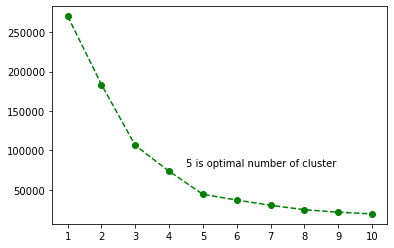

In [21]:
x = range(1,11)
y = wcss.copy()
plt.plot(x,y,'g--o')
plt.xticks(x)
plt.text(4.5,80000,"5 is optimal number of cluster")
plt.show()

In [25]:
# now we know 5 should be value of K, we will create the final model
K = 5
model = KMeans(n_clusters=K)
model.fit(X)

KMeans(n_clusters=5)

In [27]:
# lets do some predictions
category_pred = model.predict(X)

In [28]:
df['category'] = category_pred

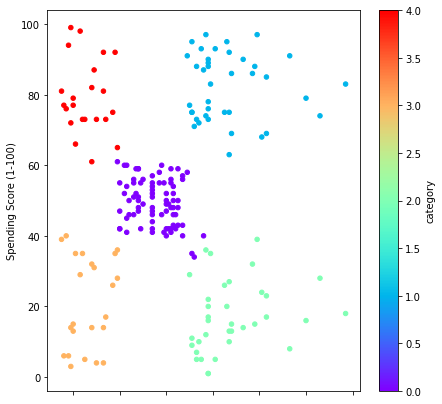

In [33]:
df.plot(kind='scatter',x='Annual Income (k$)',y='Spending Score (1-100)',c='category',figsize=(7,7),cmap='rainbow')
plt.show()